<a href="https://colab.research.google.com/github/hanwonjung/jejumaster/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%EA%B3%BC%EC%A0%9C2_%EC%9B%B9%ED%81%AC%EB%A1%A4%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.pyplot as plt

#한글 폰트 지정하기
plt.rc('font', family='cmb10')                  # (코랩)한글 폰트
plt.rc('font', family='NanumBarunGothic')       # (코랩)한글 폰트
#plt.rc('font', family='Malgun Gothic')          # (win)한글 폰트


In [ ]:
# 정적 크롤링을 위한 requests 설치
!pip install requests

In [ ]:
import os
import sys
import urllib.request
import datetime
import time
import json
import pandas as pd

now = datetime.datetime.now()
datas = []   #csv파일을 위한 변수

client_id = 'FeXsGtbhF_bq_Hlw8JJb'  # 자신의 client_id
client_pw = 'n5R8EnWcft'            # 자신의 client_secret
PATH = './sample_data'              # 수집 데이터 저장 폴더


#[CODE 1]
def get_RequestUrl(url):
    req = urllib.request.Request(url)
    req.add_header("X-Naver-Client-Id", client_id)
    req.add_header("X-Naver-Client-Secret", client_pw)

    try:
        response = urllib.request.urlopen(req)
        if response.getcode() == 200:
            print(f"[{now.strftime('%Y년%m월%d일 %H시%M분%S초')}] Url Request Success")
            return response.read().decode('utf-8')

    except Exception as e:
#         if response.getcode() == 400 and datas:
#             return None
        print(e)
        print(f"[{now.strftime('%Y년%m월%d일 %H시%M분%S초')}] Error for URL : {url}" )
        return None


#[CODE 2]  네이버 검색 API
def get_NaverSearch(node, srcText, start, display):
    base = "https://openapi.naver.com/v1/search"
    node = "/%s.json" % node
    parameters = "?query=%s&start=%s&display=%s" % (urllib.parse.quote(srcText), start, display)

    url = base + node + parameters
    responseDecode = get_RequestUrl(url)   #[CODE 1]

    if (responseDecode == None):
        return None
    else:
        return json.loads(responseDecode)

#[CODE 3]
def get_PostData(node, post, jsonResult, cnt):
    if node == 'book':
        data = {'제목':post['title'],
                '저자':post['author'],
                '출판사':post['publisher'],
                '출간일':post['pubdate'],
                '링크':post['link'],
                '이미지':post['image']}
    elif node == 'news':
        data = {'제목':post['title'],
                '링크':post['originallink'],
                '내용':post['description']}
    elif node == 'shop':
        data = {'제목':post['title'],
                '브랜드':post['brand'],
                '제조사':post['maker'],
                '가격':post['lprice'],
                '이미지':post['image']}

    jsonResult.append(data)
    datas.append(data)

    return

#[CODE 0]
def main():
    global node, srcText

    nodeType = '''-----------------------------
    네이버 검색 대상입니다.
      1.book,  2.news,  3.shop
    -----------------------------'''
    print(nodeType)
    node = input('번호를 선택하세요.')
    if node == '1': node = 'book'
    elif node == '2': node = 'news'
    elif node == '3': node = 'shop'

    srcText = input(f'{node} 검색할 검색어를 입력하세요: ')

    display, cnt = 100, 0
    jsonResult = []
    jsonResponse = get_NaverSearch(node, srcText, 1, display)  #[CODE 2]
    total = jsonResponse['total']

    while ((jsonResponse != None) and (jsonResponse['display'] != 0)):
        for post in jsonResponse['items']:
            cnt += 1
            get_PostData(node, post, jsonResult, cnt)  #[CODE 3]

        start = jsonResponse['start'] + jsonResponse['display']
        jsonResponse = get_NaverSearch(node, srcText, start, total)
#     print(f'가져올 데이터 : {total} 건')

    with open(f'{PATH}/naver_{node}_{srcText}', 'w', encoding='utf8') as outfile:
        jsonFile = json.dumps(jsonResult,  indent=4, sort_keys=True,  ensure_ascii=False)

        outfile.write(jsonFile)

    print("가져온 데이터 : %d 건" %(cnt))



    # csv 파일로 저장하기
    file = f'{PATH}/naver_{node}_{srcText}.csv'
    df = pd.DataFrame(datas)
    df.to_csv(file, index=False, encoding="utf-8-sig")
    print(f'{PATH}/naver_{node}_{srcText}.csv SAVED')
    return df

#-----------
# 시작
#-----------
df = main()
df

-----------------------------
    네이버 검색 대상입니다.
      1.book,  2.news,  3.shop
    -----------------------------
번호를 선택하세요.2
news 검색할 검색어를 입력하세요: 이주여성
[2023년11월04일 10시59분33초] Url Request Success
HTTP Error 400: Bad Request
[2023년11월04일 10시59분33초] Error for URL : https://openapi.naver.com/v1/search/news.json?query=%EC%9D%B4%EC%A3%BC%EC%97%AC%EC%84%B1&start=101&display=120714
가져온 데이터 : 100 건
./sample_data/naver_news_이주여성.csv SAVED


,제목,링크,내용
0,[전국 주요 신문 톱뉴스](4일 조간),https://www.yna.co.kr/view/AKR2023110401620050...,한겨레 = <b>이주여성</b>들의 결혼 그리고 삶 이야기 ▲ 한국일보 = '지도부...
1,결혼<b>이주여성</b>들이 말하는 존엄…“차별 없고 자존감 있어야 해요”,https://www.hani.co.kr/arti/society/rights/111...,한국 남성을 배우자로 선택한 결혼 <b>이주 여성</b>. 모든 게 낯선 한국땅 지...
2,"금산군, 2023년 다문화 우수사례 1위",https://www.ccdailynews.com/news/articleView.h...,한편 군은 올해 다문화동아리 재능기부 '나눔애 물들다' 프로그램을 통해 결혼<b>이...
3,부산은 매력도시다 | 부산콘서트홀에 비수도권 최초로 파이프오르간 설치,http://monthly.chosun.com/client/news/viw.asp?...,"2022 부산비엔날레는 <b>이주</b>, <b>여성</b>(노동자), 도시 생태계..."
4,"[부산소식] 동아대 국어문화원, 외국인 대상 한국어 대회",https://www.yna.co.kr/view/AKR2023110313430005...,"동아대학교 국어문화원은 다음 달 8일까지 한국에 살고 있는 외국인, <b>이주 여성..."
...,...,...,...
95,새로운 삶 찾아 정착한 <b>이주</b>민…혐오·배제 없이 받아들여야,http://www.jejumaeil.net/news/articleView.html...,"'신부들, 사라'의 연작은 한국 남성과 결혼한 <b>이주여성</b>들의 인물 사진이..."
96,[공주 다문화]공주시 금학동 행복모임 코바늘 뜨개질,https://www.joongdo.co.kr/web/view.php?key=202...,참가자 8명 모두 결혼 <b>이주 여성</b>이다. 그 중 한명인 러시아출신 우마 ...
97,"경주 다문화가족 나눔봉사단, 반찬 만들어 경로당에 배부",http://www.hidomin.com/news/articleView.html?i...,다문화가족 나눔 봉사단은 지역에 안정적으로 정착한 결혼이민 <b>여성</b>들과 경...
98,"(사)다문화해피로센터 호남지부, 장애인 체육대회 봉사활동 펼쳐",http://www.jeonmin.co.kr/news/articleView.html...,"특히, 이날 호원대 중소기업성장지원센터와 (사)다문화해피로센터 호남지부(상임대표 홍..."


In [ ]:
!pip install scikit-learn

[('quot', 24), ('베트남', 20), ('뇌사', 16), ('여성', 15), ('이주', 15), ('끝내', 13), ('대상', 13), ('이주여성', 13), ('숨져', 12), ('사망', 11)]


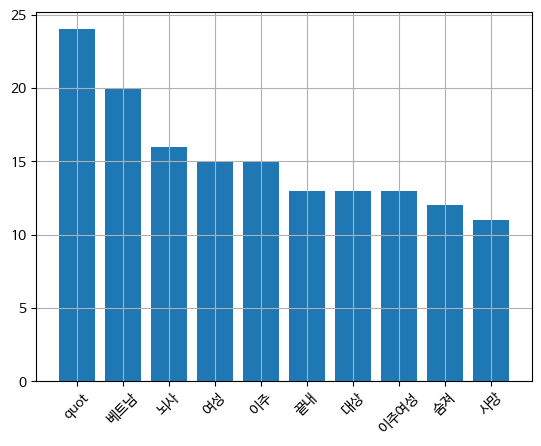

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def get_wordTokenCount(corpus):
    from sklearn.feature_extraction.text import CountVectorizer

    # 기사제목을 토큰화
    vect = CountVectorizer().fit(corpus)
    count = vect.transform(corpus).toarray().sum(axis=0)

    # 토큰 빈도수로 정렬하고 토큰명 추출
    idx = np.argsort(-count)  # 내림 정렬하여 인덱스 반환: 토큰의 인덱스
    count = count[idx]        # 토큰의 빈도수
    feature_name = np.array(vect.get_feature_names_out())[idx]  # 토큰값

    # 빈도수 많은 순서대로 토큰명 10개만 출력
    print(list(zip(feature_name, count))[:10])

    return feature_name, count


def draw_wordTokenCountGraph(data, freq):
    plt.bar(data, freq)
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()

    # 그래프 그림 저장히기
    plt.savefig(f'{PATH}/{srcText}_bar_graph.png')


# 기사제목을 토큰화하여 빈도수 가져오기
feature_name, count = get_wordTokenCount(df['제목'].to_list())

# 단어(토큰) 빈도 수_Bar그래프 그리기 : 상위 10개
draw_wordTokenCountGraph(feature_name[:10], count[:10])

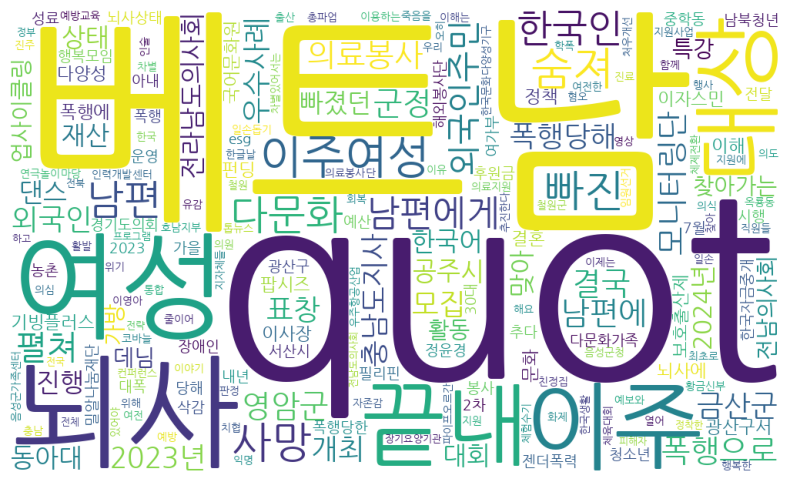

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,6)

# 한글 폰트 경로를 설정
font_path = 'NanumGothic'  #/usr/share/fonts/truetype/nanum/NanumGothic.ttf  (#코랩)
# font_path = 'malgun'  # C:/Windows/Fonts/   #(window에서)
# font_path = 'HMKMMAG' # C:/Windows/Fonts/HMKMMAG.TTF

# (토큰명, 빈도수) 딕셔너리 타입으로 변환
data = dict(zip(feature_name, count))

# 워드클라우드로 그래프로 시각화
wc = WordCloud(width = 1000, height = 600, background_color="white", font_path=font_path)
plt.imshow(wc.generate_from_frequencies(data)) #딕셔너리
plt.axis("off")
plt.show()

# 파일로 저장하기
wc.to_file(f'{PATH}/{srcText}_워드클라우드.png')